In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
x=iris.data
y=iris.target

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x.shape

(150, 4)

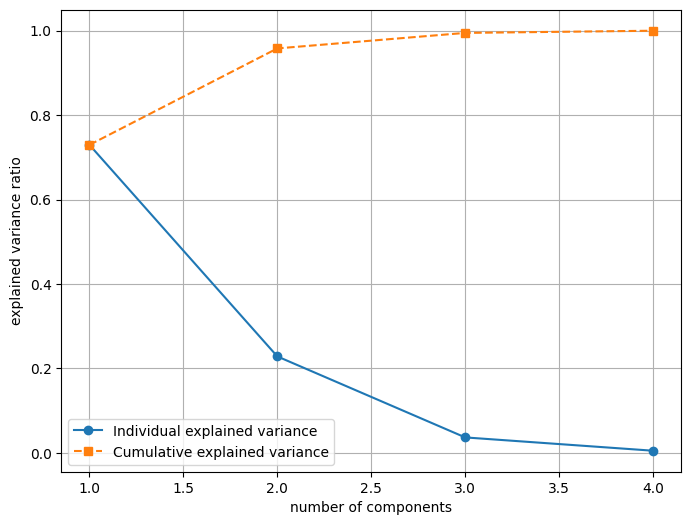

In [17]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
x_pca = pca.fit_transform(x_scaled)
plt.figure(figsize=(8,6))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_,'o-',label='Individual explained variance')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_),'s--',label='Cumulative explained variance')
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.legend()
plt.grid()
plt.show()

In [18]:
pca_95=PCA(n_components=0.95)
x_pca_95=pca_95.fit_transform(x_scaled)
print(f"Reduced shape: {x_pca_95.shape}")

Reduced shape: (150, 2)


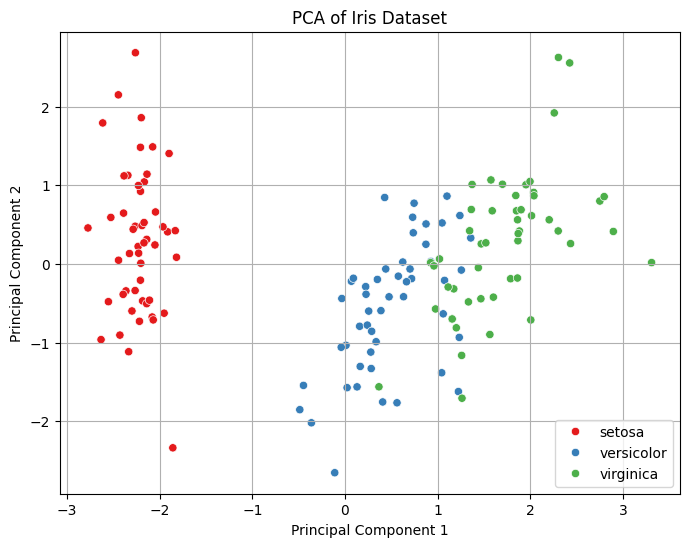

In [19]:
import seaborn as sns
pca_2d=PCA(n_components=2)
x_pca_2d=pca_2d.fit_transform(x_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca_2d[:,0], y=x_pca_2d[:,1], hue=iris.target_names[y], palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.grid()
plt.show()

# Marketing Campaign Dataset

In [20]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [21]:
x=df.drop(columns=['ID','Response','Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency'])
y=df['Response']

In [24]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca=PCA()
x_pca=pca.fit_transform(x_scaled)

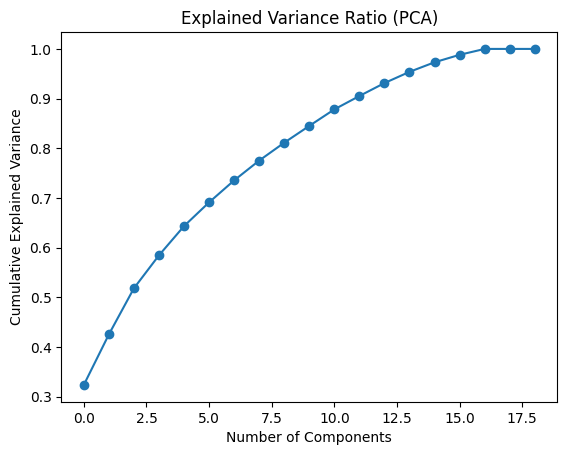

In [27]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)
plt.plot(cum_var, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance Ratio (PCA)")
plt.show()

In [29]:
pca_final = PCA(n_components=0.90)
X_reduced = pca_final.fit_transform(x_scaled)

print("Reduced Dataset Shape:", X_reduced.shape)

Reduced Dataset Shape: (2240, 12)


In [31]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=x.columns,
    columns=[f"PC{i+1}" for i in range(len(x.columns))]
)
print(loadings["PC1"].abs().sort_values(ascending=False).head(5))

NumCatalogPurchases    0.346302
MntMeatProducts        0.341049
MntWines               0.331216
MntFishProducts        0.310129
NumStorePurchases      0.309416
Name: PC1, dtype: float64


In [32]:
print(loadings["PC2"].abs().sort_values(ascending=False).head(5))

AcceptedCmp4    0.531308
AcceptedCmp2    0.449384
AcceptedCmp5    0.326435
AcceptedCmp1    0.281909
MntWines        0.269005
Name: PC2, dtype: float64


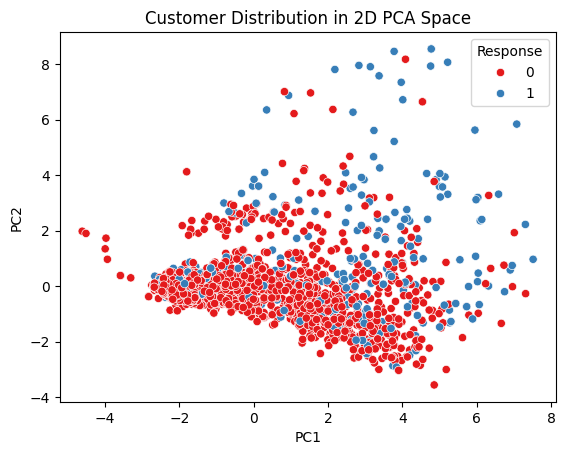

In [36]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(x_scaled)

sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette='Set1')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Distribution in 2D PCA Space")
plt.show()

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time
k = 4
start = time.time()
kmeans_orig = KMeans(n_clusters=k, random_state=42)
labels_orig = kmeans_orig.fit_predict(x_scaled)
time_orig = time.time() - start
sil_orig = silhouette_score(x_scaled, labels_orig)
print("Original Data Silhouette:", sil_orig)
print("Original Data Time:", time_orig)

Original Data Silhouette: 0.3349985368609901
Original Data Time: 2.9507980346679688


PCA Data Silhouette: 0.35609883101644174
PCA Data Time: 0.035423994064331055


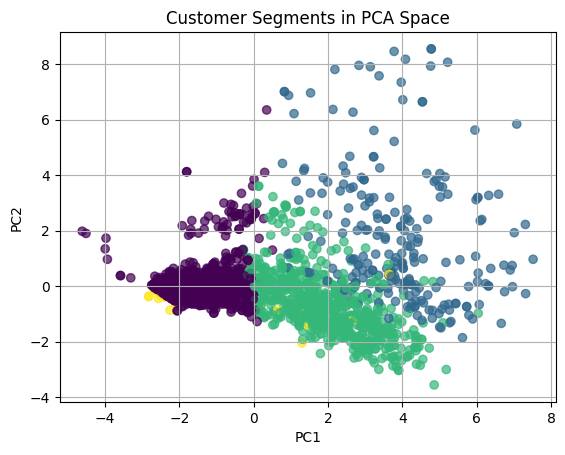

In [37]:
start = time.time()
kmeans_pca = KMeans(n_clusters=k, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_reduced)
time_pca = time.time() - start
sil_pca = silhouette_score(X_reduced, labels_pca)
print("PCA Data Silhouette:", sil_pca)
print("PCA Data Time:", time_pca)
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_pca, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segments in PCA Space")
plt.grid()
plt.show()